In [1]:
import os
import json
import numpy as np
import pandas as pd
import pyproj
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from pysheds.grid import Grid
from matplotlib import colors
import seaborn as sns
import warnings
from swmmtoolbox import swmmtoolbox
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

warnings.filterwarnings('ignore')
sns.set()
sns.set_palette('husl', 7)

%matplotlib inline

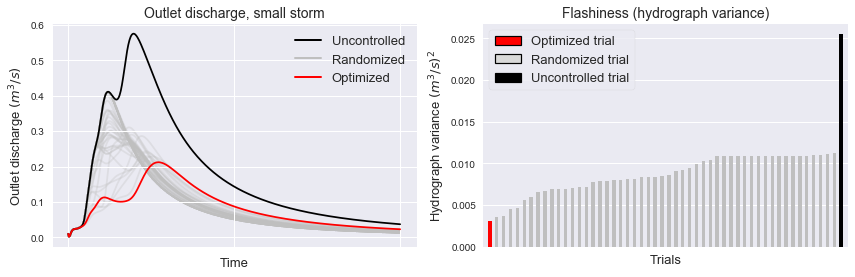

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

output_dir = '../data/out'

var = {}

for fn in os.listdir(output_dir):
    basename = fn.split('_diff')[0]
    if (('diff' in fn) and ('50pct' in fn)) or ('uncontrolled' in fn):
        if fn == 'uncontrolled_diff_0.5in.out':
            outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
            var[basename] = outfall.var()[0]
            outfall.plot(ax=ax[0], legend=False, color='k', zorder=1)
        elif fn.startswith('linear') and ('0.5in' in fn):
            if 'k30' in fn:
                outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
                var[basename] = outfall.var()[0]
                outfall.plot(ax=ax[0], legend=False, color='r', zorder=2)
                
        elif fn.startswith('naive') and ('0.5in' in fn):
            outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
            var[basename] = outfall.var()[0]
            outfall.plot(ax=ax[0], legend=False, color='0.75', alpha=0.3, zorder=0)
            
var = pd.Series(var).sort_values()
colors = pd.Series(var.index.str.split('_').str[0]).map({'linear' : 'r', 'naive' : '0.75', 'uncontrolled' : 'k'})
var.plot(ax=ax[1], kind='bar', colors=colors)
ax[0].set_ylabel('Outlet discharge $(m^3/s)$', size=13)
ax[1].set_ylabel('Hydrograph variance $(m^3/s)^2$', size=13)
plt.tight_layout()
ax[0].get_xaxis().set_ticklabels([])
ax[0].minorticks_off()
ax[1].get_xaxis().set_ticks([])
ax[0].set_title('Outlet discharge, small storm', size=14)
ax[1].set_title('Flashiness (hydrograph variance)', size=14)

custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='0.75', lw=2),
                Line2D([0], [0], color='r', lw=2)]

ax[0].legend(custom_lines, ['Uncontrolled', 'Randomized', 'Optimized'], loc=1, fontsize=13)
ax[0].set_xlabel('Time', size=13)
ax[1].set_xlabel('Trials', size=13, labelpad=8)

red_patch = mpatches.Patch(facecolor='r', label='Optimized trial', linewidth=1.2, edgecolor='k')
white_patch = mpatches.Patch(facecolor='0.85', label='Randomized trial', linewidth=1.2, edgecolor='k')
black_patch = mpatches.Patch(facecolor='k', label='Uncontrolled trial', linewidth=1.2, edgecolor='k')

leg1 = ax[1].legend(handles=[red_patch, white_patch, black_patch],
          frameon=True, fontsize=13, loc=2)
ax[1].get_legend().get_title().set_fontsize(13)
ax[1].get_legend().get_title().set_fontweight('bold')
ax[1].set_xlim(-1, 52)

plt.savefig('../img/performance_var_small.png', bbox_inches='tight', dpi=200)


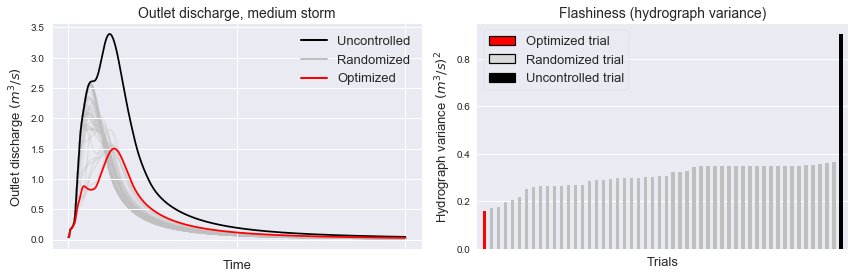

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

output_dir = '../data/out'

var = {}

for fn in os.listdir(output_dir):
    basename = fn.split('_diff')[0]
    if (('diff' in fn) and ('50pct' in fn)) or ('uncontrolled' in fn):
        if fn == 'uncontrolled_diff_1.5in.out':
            outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
            var[basename] = outfall.var()[0]
            outfall.plot(ax=ax[0], legend=False, color='k', zorder=1)
        elif fn.startswith('linear') and ('1.5in' in fn):
            if 'k30' in fn:
                outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
                var[basename] = outfall.var()[0]
                outfall.plot(ax=ax[0], legend=False, color='r', zorder=2)
                
        elif fn.startswith('naive') and ('1.5in' in fn):
            outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
            var[basename] = outfall.var()[0]
            outfall.plot(ax=ax[0], legend=False, color='0.75', alpha=0.3, zorder=0)
            
var = pd.Series(var).sort_values()
colors = pd.Series(var.index.str.split('_').str[0]).map({'linear' : 'r', 'naive' : '0.75', 'uncontrolled' : 'k'})
var.plot(ax=ax[1], kind='bar', colors=colors)
ax[0].set_ylabel('Outlet discharge $(m^3/s)$', size=13)
ax[1].set_ylabel('Hydrograph variance $(m^3/s)^2$', size=13)
plt.tight_layout()
ax[0].get_xaxis().set_ticklabels([])
ax[0].minorticks_off()
ax[1].get_xaxis().set_ticks([])
ax[0].set_title('Outlet discharge, medium storm', size=14)
ax[1].set_title('Flashiness (hydrograph variance)', size=14)

custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='0.75', lw=2),
                Line2D([0], [0], color='r', lw=2)]

ax[0].legend(custom_lines, ['Uncontrolled', 'Randomized', 'Optimized'], loc=1, fontsize=13)
ax[0].set_xlabel('Time', size=13)
ax[1].set_xlabel('Trials', size=13, labelpad=8)

red_patch = mpatches.Patch(facecolor='r', label='Optimized trial', linewidth=1.2, edgecolor='k')
white_patch = mpatches.Patch(facecolor='0.85', label='Randomized trial', linewidth=1.2, edgecolor='k')
black_patch = mpatches.Patch(facecolor='k', label='Uncontrolled trial', linewidth=1.2, edgecolor='k')

leg1 = ax[1].legend(handles=[red_patch, white_patch, black_patch],
          frameon=True, fontsize=13, loc=2)
ax[1].get_legend().get_title().set_fontsize(13)
ax[1].get_legend().get_title().set_fontweight('bold')
ax[1].set_xlim(-1, 52)

plt.savefig('../img/performance_var_med.png', bbox_inches='tight', dpi=200)


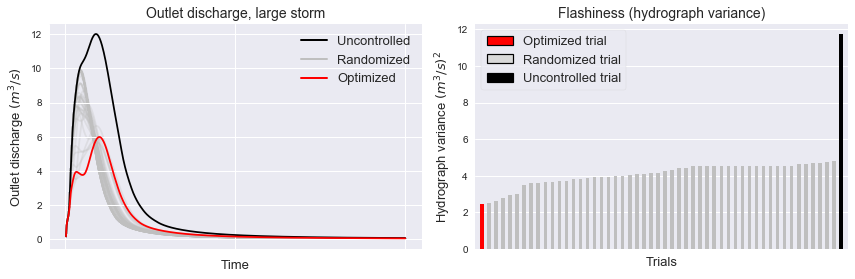

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

output_dir = '../data/out'

var = {}

for fn in os.listdir(output_dir):
    basename = fn.split('_diff')[0]
    if (('diff' in fn) and ('50pct' in fn)) or ('uncontrolled' in fn):
        if fn == 'uncontrolled_diff_4in.out':
            outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
            var[basename] = outfall.var()[0]
            outfall.plot(ax=ax[0], legend=False, color='k', zorder=1)
        elif fn.startswith('linear') and ('4in' in fn):
            if 'k30' in fn:
                outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
                var[basename] = outfall.var()[0]
                outfall.plot(ax=ax[0], legend=False, color='r', zorder=2)
                
        elif fn.startswith('naive') and ('4in' in fn):
            outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
            var[basename] = outfall.var()[0]
            outfall.plot(ax=ax[0], legend=False, color='0.75', alpha=0.3, zorder=0)
            
var = pd.Series(var).sort_values()
colors = pd.Series(var.index.str.split('_').str[0]).map({'linear' : 'r', 'naive' : '0.75', 'uncontrolled' : 'k'})
var.plot(ax=ax[1], kind='bar', colors=colors)
ax[0].set_ylabel('Outlet discharge $(m^3/s)$', size=13)
ax[1].set_ylabel('Hydrograph variance $(m^3/s)^2$', size=13)
plt.tight_layout()
ax[0].get_xaxis().set_ticklabels([])
ax[0].minorticks_off()
ax[1].get_xaxis().set_ticks([])
ax[0].set_title('Outlet discharge, large storm', size=14)
ax[1].set_title('Flashiness (hydrograph variance)', size=14)

custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='0.75', lw=2),
                Line2D([0], [0], color='r', lw=2)]

ax[0].legend(custom_lines, ['Uncontrolled', 'Randomized', 'Optimized'], loc=1, fontsize=13)
ax[0].set_xlabel('Time', size=13)
ax[1].set_xlabel('Trials', size=13, labelpad=8)

red_patch = mpatches.Patch(facecolor='r', label='Optimized trial', linewidth=1.2, edgecolor='k')
white_patch = mpatches.Patch(facecolor='0.85', label='Randomized trial', linewidth=1.2, edgecolor='k')
black_patch = mpatches.Patch(facecolor='k', label='Uncontrolled trial', linewidth=1.2, edgecolor='k')

leg1 = ax[1].legend(handles=[red_patch, white_patch, black_patch],
          frameon=True, fontsize=13, loc=2)
ax[1].get_legend().get_title().set_fontsize(13)
ax[1].get_legend().get_title().set_fontweight('bold')
ax[1].set_xlim(-1, 52)

plt.savefig('../img/performance_var_large.png', bbox_inches='tight', dpi=200)


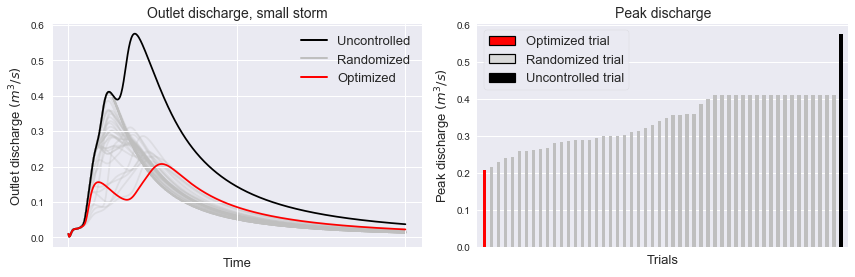

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

output_dir = '../data/out'

maxes = {}

for fn in os.listdir(output_dir):
    basename = fn.split('_diff')[0]
    if (('diff' in fn) and ('50pct' in fn)) or ('uncontrolled' in fn):
        if fn == 'uncontrolled_diff_0.5in.out':
            outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
            maxes[basename] = outfall.max()[0]
            outfall.plot(ax=ax[0], legend=False, color='k', zorder=1)
        elif fn.startswith('linear') and ('0.5in' in fn):
            if 'k35' in fn:
                outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
                maxes[basename] = outfall.max()[0]
                outfall.plot(ax=ax[0], legend=False, color='r', zorder=2)
                
        elif fn.startswith('naive') and ('0.5in' in fn):
            outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
            maxes[basename] = outfall.max()[0]
            outfall.plot(ax=ax[0], legend=False, color='0.75', alpha=0.3, zorder=0)
            
maxes = pd.Series(maxes).sort_values()
colors = pd.Series(maxes.index.str.split('_').str[0]).map({'linear' : 'r', 'naive' : '0.75', 'uncontrolled' : 'k'})
maxes.plot(ax=ax[1], kind='bar', colors=colors)
ax[0].set_ylabel('Outlet discharge $(m^3/s)$', size=13)
ax[1].set_ylabel('Peak discharge $(m^3/s)$', size=13)
plt.tight_layout()
ax[0].get_xaxis().set_ticklabels([])
ax[0].minorticks_off()
ax[1].get_xaxis().set_ticks([])
ax[0].set_title(r'Outlet discharge, small storm', size=14)
ax[1].set_title(r'Peak discharge', size=14)

custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='0.75', lw=2),
                Line2D([0], [0], color='r', lw=2)]

ax[0].legend(custom_lines, ['Uncontrolled', 'Randomized', 'Optimized'], loc=1, fontsize=13)
ax[0].set_xlabel('Time', size=13)
ax[1].set_xlabel('Trials', size=13, labelpad=8)

red_patch = mpatches.Patch(facecolor='r', label='Optimized trial', linewidth=1.2, edgecolor='k')
white_patch = mpatches.Patch(facecolor='0.85', label='Randomized trial', linewidth=1.2, edgecolor='k')
black_patch = mpatches.Patch(facecolor='k', label='Uncontrolled trial', linewidth=1.2, edgecolor='k')

leg1 = ax[1].legend(handles=[red_patch, white_patch, black_patch],
          frameon=True, fontsize=13, loc=2)
ax[1].get_legend().get_title().set_fontsize(13)
ax[1].get_legend().get_title().set_fontweight('bold')
ax[1].set_xlim(-1, 52)

plt.savefig('../img/performance_max_small.png', bbox_inches='tight', dpi=200)


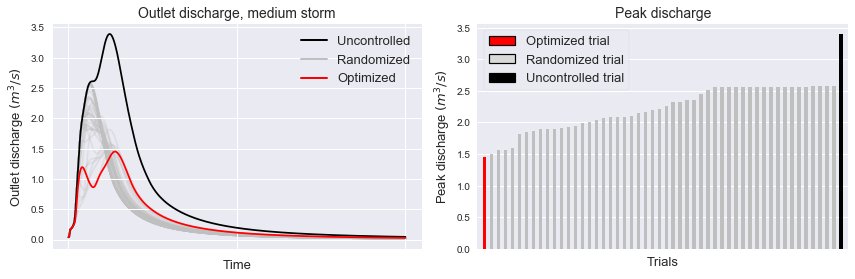

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

output_dir = '../data/out'

maxes = {}

for fn in os.listdir(output_dir):
    basename = fn.split('_diff')[0]
    if (('diff' in fn) and ('50pct' in fn)) or ('uncontrolled' in fn):
        if fn == 'uncontrolled_diff_1.5in.out':
            outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
            maxes[basename] = outfall.max()[0]
            outfall.plot(ax=ax[0], legend=False, color='k', zorder=1)
        elif fn.startswith('linear') and ('1.5in' in fn):
            if 'k35' in fn:
                outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
                maxes[basename] = outfall.max()[0]
                outfall.plot(ax=ax[0], legend=False, color='r', zorder=2)
                
        elif fn.startswith('naive') and ('1.5in' in fn):
            outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
            maxes[basename] = outfall.max()[0]
            outfall.plot(ax=ax[0], legend=False, color='0.75', alpha=0.3, zorder=0)
            
maxes = pd.Series(maxes).sort_values()
colors = pd.Series(maxes.index.str.split('_').str[0]).map({'linear' : 'r', 'naive' : '0.75', 'uncontrolled' : 'k'})
maxes.plot(ax=ax[1], kind='bar', colors=colors)
ax[0].set_ylabel('Outlet discharge $(m^3/s)$', size=13)
ax[1].set_ylabel('Peak discharge $(m^3/s)$', size=13)
plt.tight_layout()
ax[0].get_xaxis().set_ticklabels([])
ax[0].minorticks_off()
ax[1].get_xaxis().set_ticks([])
ax[0].set_title(r'Outlet discharge, medium storm', size=14)
ax[1].set_title(r'Peak discharge', size=14)

custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='0.75', lw=2),
                Line2D([0], [0], color='r', lw=2)]

ax[0].legend(custom_lines, ['Uncontrolled', 'Randomized', 'Optimized'], loc=1, fontsize=13)
ax[0].set_xlabel('Time', size=13)
ax[1].set_xlabel('Trials', size=13, labelpad=8)

red_patch = mpatches.Patch(facecolor='r', label='Optimized trial', linewidth=1.2, edgecolor='k')
white_patch = mpatches.Patch(facecolor='0.85', label='Randomized trial', linewidth=1.2, edgecolor='k')
black_patch = mpatches.Patch(facecolor='k', label='Uncontrolled trial', linewidth=1.2, edgecolor='k')

leg1 = ax[1].legend(handles=[red_patch, white_patch, black_patch],
          frameon=True, fontsize=13, loc=2)
ax[1].get_legend().get_title().set_fontsize(13)
ax[1].get_legend().get_title().set_fontweight('bold')
ax[1].set_xlim(-1, 52)

plt.savefig('../img/performance_max_med.png', bbox_inches='tight', dpi=200)


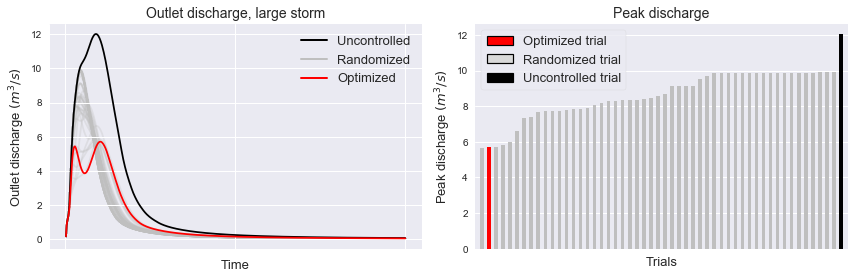

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

output_dir = '../data/out'

maxes = {}

for fn in os.listdir(output_dir):
    basename = fn.split('_diff')[0]
    if (('diff' in fn) and ('50pct' in fn)) or ('uncontrolled' in fn):
        if fn == 'uncontrolled_diff_4in.out':
            outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
            maxes[basename] = outfall.max()[0]
            outfall.plot(ax=ax[0], legend=False, color='k', zorder=1)
        elif fn.startswith('linear') and ('4in' in fn):
            if 'k35' in fn:
                outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
                maxes[basename] = outfall.max()[0]
                outfall.plot(ax=ax[0], legend=False, color='r', zorder=2)
                
        elif fn.startswith('naive') and ('4in' in fn):
            outfall = swmmtoolbox.extract('../data/out/{0}'.format(fn), 'system,Flow_leaving_outfalls,11')
            maxes[basename] = outfall.max()[0]
            outfall.plot(ax=ax[0], legend=False, color='0.75', alpha=0.3, zorder=0)
            
maxes = pd.Series(maxes).sort_values()
colors = pd.Series(maxes.index.str.split('_').str[0]).map({'linear' : 'r', 'naive' : '0.75', 'uncontrolled' : 'k'})
maxes.plot(ax=ax[1], kind='bar', colors=colors)
ax[0].set_ylabel('Outlet discharge $(m^3/s)$', size=13)
ax[1].set_ylabel('Peak discharge $(m^3/s)$', size=13)
plt.tight_layout()
ax[0].get_xaxis().set_ticklabels([])
ax[0].minorticks_off()
ax[1].get_xaxis().set_ticks([])
ax[0].set_title(r'Outlet discharge, large storm', size=14)
ax[1].set_title(r'Peak discharge', size=14)

custom_lines = [Line2D([0], [0], color='k', lw=2),
                Line2D([0], [0], color='0.75', lw=2),
                Line2D([0], [0], color='r', lw=2)]

ax[0].legend(custom_lines, ['Uncontrolled', 'Randomized', 'Optimized'], loc=1, fontsize=13)
ax[0].set_xlabel('Time', size=13)
ax[1].set_xlabel('Trials', size=13, labelpad=8)

red_patch = mpatches.Patch(facecolor='r', label='Optimized trial', linewidth=1.2, edgecolor='k')
white_patch = mpatches.Patch(facecolor='0.85', label='Randomized trial', linewidth=1.2, edgecolor='k')
black_patch = mpatches.Patch(facecolor='k', label='Uncontrolled trial', linewidth=1.2, edgecolor='k')

leg1 = ax[1].legend(handles=[red_patch, white_patch, black_patch],
          frameon=True, fontsize=13, loc=2)
ax[1].get_legend().get_title().set_fontsize(13)
ax[1].get_legend().get_title().set_fontweight('bold')
ax[1].set_xlim(-1, 52)

plt.savefig('../img/performance_max_large.png', bbox_inches='tight', dpi=200)


In [8]:
maxes

naive_k18_50pct_115        5.662096
linear_k35_50pct_phi10     5.702808
naive_k17_50pct_43         5.706589
naive_k21_50pct_65         5.847021
naive_k12_50pct_26         5.978899
naive_k11_50pct_98         6.626611
naive_k5_50pct_6           7.327073
naive_k10_50pct_49         7.374123
naive_k19_50pct_109        7.692108
naive_k6_50pct_119         7.737806
naive_k3_50pct_100         7.737842
naive_k13_50pct_12         7.752308
naive_k13_50pct_40         7.808986
naive_k18_50pct_122        7.818908
naive_k24_50pct_89         7.826662
naive_k13_50pct_56         7.875075
naive_k13_50pct_37         8.060450
naive_k10_50pct_2          8.202779
naive_k5_50pct_24          8.299727
naive_k12_50pct_18         8.299948
naive_k10_50pct_20         8.330335
naive_k7_50pct_50          8.341836
naive_k9_50pct_68          8.348442
naive_k15_50pct_13         8.404380
naive_k15_50pct_123        8.462901
naive_k7_50pct_16          8.567753
naive_k11_50pct_38         8.671113
naive_k6_50pct_59          9

In [9]:
var[0] / var[-1]

0.21097146600063604

In [10]:
var[1:-1].mean() / var[-1]

0.34924165438796445

In [11]:
maxes[1] / maxes[-1]

0.4743748107007448

In [12]:
maxes[2:-1].mean() / maxes[-1]

0.7236819625963954